In [1]:
import importlib
import matplotlib.pyplot  as plt
import numpy as np
import os
import utils
from tqdm.notebook import tqdm
import networkx as nx
import math
from scipy import spatial
import pickle

# Own modules
import agent as ag
import utils
import language
import perception as perc

# LDA Agent

LDA from [GenSim](https://radimrehurek.com/gensim/models/ldamodel.html)

In [ ]:
keywords = ['cat', 'human', 'dog', 'nature', 'usa', 'europe']
# Random Wikipedia Words
articles = language.get_wiki_documents(5000, keywords=keywords, topwords=20)

In [54]:


lda_params = {
    'corpus' : language.corpus,
    'id2word' : language.common_dictionary,
    'num_topics' : 5,
    'random_state' : 1,
    'update_every' : 1,
    'chunksize' : 50,
    'passes' : 10,
    'alpha' : 'auto',
    'eta' : 'auto',
    'minimum_probability' : 0,
    'per_word_topics' : False
}
lda_model = language.train_lda_model(articles, lda_params, model_name='test_model')

Coherence: 0.3853273941382219


In [55]:
from gensim.test.utils import datapath
from gensim.models import LdaModel

lda_model2 = LdaModel.load(datapath("lda_model1"))

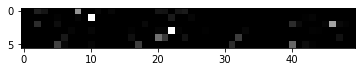

In [56]:
headers = {
    'User-Agent': 'WikiRaceBot/LDAAgent',
    'From': 'paul.kahlmeyer@uni-jena.de'
}

new_words = ['Human','Dog','Art','Cat','Australia', 'Automobile']

resps = [utils.scrape_keyword(headers=headers, keyword=kw, max_words=50) for kw in new_words]


vectors = perc.lda_perception(resps, lda_model2)
plt.imshow(vectors, cmap='gray')

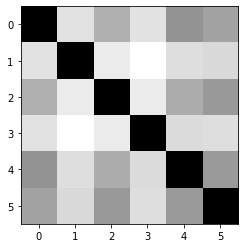

In [57]:
from sklearn.metrics.pairwise import euclidean_distances
plt.imshow(euclidean_distances(vectors, vectors), cmap='gray')

In [47]:
# WikiRace
importlib.reload(ag)
importlib.reload(utils)
importlib.reload(language)
importlib.reload(perc)

lda_percept = lambda resps: perc.lda_perception(resps, lda_model)
agent = ag.GraphGreedyAgent(perception=lda_percept, dist_func=utils.euclid_dist)
kwargs = {
    'agent' : agent,
    'start_node' : 'nebraska',
    'target_node' : 'asthma',
    'max_it' : 100,
    'print_progress' : True,
    'scrape_params' : {'allowed_words' : language.corpus, 'max_words' : 10, 'max_links' : 50}
}
path, terminated = ag.wikiRaceReal(**kwargs)

Navigating from nebraska to asthma
nebraska
Scraping Sucessor: Niobrara_River
Scraping Sucessor: Oglala_National_Grassland
Scraping Sucessor: California_Trail
Scraping Sucessor: Adrian_Smith_(politician)
Scraping Sucessor: Montana
Scraping Sucessor: Minnesota
Scraping Sucessor: Oregon_Trail
Scraping Sucessor: Nevada
Scraping Sucessor: African_American
Scraping Sucessor: Wisconsin
Scraping Sucessor: Indian_reservation
Scraping Sucessor: Rock_Creek_Station
Scraping Sucessor: Nebraska_Territory
Scraping Sucessor: Missouri
Scraping Sucessor: Nebraska_Legislature
Scraping Sucessor: Pine_Ridge_(region)
Scraping Sucessor: Pawnee_people
Scraping Sucessor: Catholic_Church
Scraping Sucessor: Nebraska_National_Forest
Scraping Sucessor: Wyoming
Scraping Sucessor: Mormon_Trail
Scraping Sucessor: Oklahoma
Scraping Sucessor: Time_zone
Scraping Sucessor: North_Dakota
Scraping Sucessor: Colorado
Scraping Sucessor: Thunderstorm
Scraping Sucessor: Bailey_Yard
Scraping Sucessor: Mountain_Time_Zone
Scrapin

Scraping Sucessor: Twelfth_Avenue_(Manhattan)
Scraping Sucessor: Cobble_Hill_Tunnel
Scraping Sucessor: Hudson_River
Scraping Sucessor: Bay_Ridge_Branch
Scraping Sucessor: East_Side_Access
Scraping Sucessor: Port_Jefferson_Branch
Scraping Sucessor: Gateway_Project
Scraping Sucessor: Commuter_rail
Scraping Sucessor: West_Brighton_Beach_Division
Scraping Sucessor: Fairway_Market
Scraping Sucessor: Morris_Park_Facility
Rail_yard
Scraping Sucessor: Refuge_siding
Scraping Sucessor: Unit_train
Scraping Sucessor: Track_ballast
Scraping Sucessor: Spanish_solution
Scraping Sucessor: Ladder_track
Scraping Sucessor: Railway_platform
Scraping Sucessor: Side_platform
Scraping Sucessor: Railway_company
Scraping Sucessor: Double_junction
Scraping Sucessor: Pittsburgh
Scraping Sucessor: Chicago
Scraping Sucessor: Mountain_Top_Yard
Scraping Sucessor: Main_line_(railway)
Scraping Sucessor: Track_geometry
Scraping Sucessor: Gradient
Scraping Sucessor: Rail_fastening_system
Scraping Sucessor: Track_(rail_t

Scraping Sucessor: Polynomial
Scraping Sucessor: Koch_snowflake
Scraping Sucessor: Square_(geometry)
Scraping Sucessor: Jordan_curve_theorem
Scraping Sucessor: Spheroid
Scraping Sucessor: Great_ellipse
Scraping Sucessor: Line_(geometry)
Scraping Sucessor: World_line
Scraping Sucessor: Interval_(mathematics)
Scraping Sucessor: General_relativity
Scraping Sucessor: Riemann_surface
Scraping Sucessor: Ray_(geometry)
Scraping Sucessor: Manifold
Scraping Sucessor: Sphere
Scraping Sucessor: Circle
Scraping Sucessor: Jordan_curve
Scraping Sucessor: Surface_(mathematics)
Arc_length
Scraping Sucessor: Infinitesimal_calculus
Scraping Sucessor: Binomial_theorem
Scraping Sucessor: Riemann_integral
Scraping Sucessor: Approximation
Scraping Sucessor: Parabola
Scraping Sucessor: Radius
Scraping Sucessor: Machine_epsilon
Scraping Sucessor: Plane_curve
Scraping Sucessor: Curve
Scraping Sucessor: Divergence_theorem
Scraping Sucessor: Archimedes
Scraping Sucessor: Polygon
Scraping Sucessor: Chain_rule
Scr

Scraping Sucessor: Iteration
Scraping Sucessor: Mathematics
Scraping Sucessor: T-square_(fractal)
Scraping Sucessor: Turbulence
Scraping Sucessor: Complexity
Scraping Sucessor: Algorithm
Scraping Sucessor: fractal
Scraping Sucessor: gestalt
Scraping Sucessor: Formula
Scraping Sucessor: Polygon
Scraping Sucessor: Dragon_curve
Scraping Sucessor: Percolation_theory
Scraping Sucessor: Shape
Scraping Sucessor: Recurrence_relation
Scraping Sucessor: Homunculus
Scraping Sucessor: Fractal_landscape
Scraping Sucessor: Mandelbrot_set
Scraping Sucessor: Recursion
Scraping Sucessor: Complex_numbers
Scraping Sucessor: Hilbert_curve
Scraping Sucessor: Symmetry
Scraping Sucessor: Fractal_curve
Scraping Sucessor: Koch_curve
Scraping Sucessor: Newton_fractal
Scraping Sucessor: Burning_Ship_fractal
Scraping Sucessor: Measure_theory
Scraping Sucessor: Fractal_art
Scraping Sucessor: Computer_graphics
Scraping Sucessor: Koch_snowflake
Scraping Sucessor: Correlation_dimension
Scraping Sucessor: Bifurcation_

Scraping Sucessor: Astronomy
Scraping Sucessor: Polynomial_equation
Scraping Sucessor: Archimedes
Scraping Sucessor: Great_circle
Scraping Sucessor: Dragon_curve
Scraping Sucessor: Triple_helix
Scraping Sucessor: Loop_(topology)
Scraping Sucessor: Field_(mathematics)
Scraping Sucessor: Union_(set_theory)
Scraping Sucessor: Helix
Scraping Sucessor: Complex_number
Scraping Sucessor: Arc_length
Scraping Sucessor: Region_(mathematics)
Scraping Sucessor: Cryptography
Scraping Sucessor: Set_complement
Scraping Sucessor: Torus
Scraping Sucessor: Fractal_curve
Scraping Sucessor: Cycloid
Scraping Sucessor: Line_segment
Scraping Sucessor: Point_(geometry)
Scraping Sucessor: Image_(mathematics)
Scraping Sucessor: Catenary
Scraping Sucessor: Real_number
Scraping Sucessor: Polynomial
Scraping Sucessor: Koch_snowflake
Scraping Sucessor: Square_(geometry)
Scraping Sucessor: Jordan_curve_theorem
Scraping Sucessor: Spheroid
Scraping Sucessor: Great_ellipse
Scraping Sucessor: Line_(geometry)
Scraping Su

Scraping Sucessor: Time_evolution
Scraping Sucessor: Fiber_bundle
Scraping Sucessor: Covering_map
Scraping Sucessor: Immersion_(mathematics)
Scraping Sucessor: Solid_Klein_bottle
Scraping Sucessor: Triangulation_(topology)
Scraping Sucessor: Genus_(mathematics)
Scraping Sucessor: Limerick_(poetry)
Scraping Sucessor: Science_Museum_(London)
Scraping Sucessor: Cylinder
Scraping Sucessor: Handle_decomposition
Scraping Sucessor: Torus
Scraping Sucessor: Surface_(topology)
Scraping Sucessor: Compact_space
Scraping Sucessor: Roman_surface
Scraping Sucessor: X_Window_System
Scraping Sucessor: OS_X
Scraping Sucessor: Fundamental_polygon
Scraping Sucessor: Square_(geometry)
Scraping Sucessor: Fundamental_region
Scraping Sucessor: Fundamental_group
Scraping Sucessor: Transition_map
Scraping Sucessor: Four_color_theorem
Scraping Sucessor: Project_Euclid
Scraping Sucessor: Riemann_surface
Scraping Sucessor: Manifold
Scraping Sucessor: Euler_characteristic
Scraping Sucessor: Sphere
Scraping Sucesso

Scraping Sucessor: Set_complement
Scraping Sucessor: Torus
Scraping Sucessor: Fractal_curve
Scraping Sucessor: Cycloid
Scraping Sucessor: Line_segment
Scraping Sucessor: Point_(geometry)
Scraping Sucessor: Image_(mathematics)
Scraping Sucessor: Catenary
Scraping Sucessor: Real_number
Scraping Sucessor: Polynomial
Scraping Sucessor: Koch_snowflake
Scraping Sucessor: Square_(geometry)
Scraping Sucessor: Jordan_curve_theorem
Scraping Sucessor: Spheroid
Scraping Sucessor: Great_ellipse
Scraping Sucessor: Line_(geometry)
Scraping Sucessor: World_line
Scraping Sucessor: Interval_(mathematics)
Scraping Sucessor: General_relativity
Scraping Sucessor: Riemann_surface
Scraping Sucessor: Ray_(geometry)
Scraping Sucessor: Manifold
Scraping Sucessor: Sphere
Scraping Sucessor: Circle
Scraping Sucessor: Jordan_curve
Scraping Sucessor: Surface_(mathematics)
Fractal_curve
Scraping Sucessor: Rendering_(computer_graphics)
Scraping Sucessor: Moore_curve
Scraping Sucessor: T-square_(fractal)
Scraping Suces

Scraping Sucessor: Russian_Mennonite
Scraping Sucessor: Christian_fundamentalism
Scraping Sucessor: Radical_Pietism
Scraping Sucessor: River_Brethren
Scraping Sucessor: Christendom
Scraping Sucessor: Old_Testament
Scraping Sucessor: Christianity
Scraping Sucessor: Pietism
Scraping Sucessor: Lutheranism
Scraping Sucessor: Melchior_Hoffman
Scraping Sucessor: Calvinism
Scraping Sucessor: Reformation
Scraping Sucessor: Swiss_Brethren
Scraping Sucessor: Christian_art
Scraping Sucessor: Holiness_movement
Scraping Sucessor: Evangelicalism
Scraping Sucessor: Christian_theology
Scraping Sucessor: Old_Order_Mennonite
Scraping Sucessor: Radical_Reformation
Scraping Sucessor: Arminianism
Christian_ethics
Scraping Sucessor: Western_Rite_Orthodoxy
Scraping Sucessor: Christian_mission
Scraping Sucessor: Natural_law
Scraping Sucessor: Christian_pacifism
Scraping Sucessor: Christian_denomination
Scraping Sucessor: Christology
Scraping Sucessor: Western_Christianity
Scraping Sucessor: Baptism
Scraping S

Scraping Sucessor: Cockfighting
Scraping Sucessor: Poaching
Scraping Sucessor: River_Humber
Scraping Sucessor: Highway_robbery
Scraping Sucessor: Candle
Scraping Sucessor: Fence_(criminal)
Scraping Sucessor: Grocer
Scraping Sucessor: Binding_over
Scraping Sucessor: Surety
Scraping Sucessor: Hackney_(parish)
Scraping Sucessor: Jack_Ketch
Scraping Sucessor: York_Castle
Scraping Sucessor: Indictment
Scraping Sucessor: York
Scraping Sucessor: Newgate_Calendar
Scraping Sucessor: levant
Scraping Sucessor: Conviction
Scraping Sucessor: Cambridge
Scraping Sucessor: Small_pox
Scraping Sucessor: Roman_Catholic
Scraping Sucessor: Westminster
Scraping Sucessor: Gelding
Scraping Sucessor: Gentleman
Scraping Sucessor: Hanging
Scraping Sucessor: Apprentice
Scraping Sucessor: Winchester
Scraping Sucessor: Peddler
Scraping Sucessor: Retail_Price_Index
Scraping Sucessor: London_Weekend_Television
Scraping Sucessor: Butcher
Scraping Sucessor: Counterfeit_money
Scraping Sucessor: Yorkshire
Scraping Sucess

Scraping Sucessor: Gambling
Scraping Sucessor: Home_invasion
Scraping Sucessor: Assault
Scraping Sucessor: Intellectual_property
Scraping Sucessor: Mayhem_(crime)
Scraping Sucessor: Arson
Scraping Sucessor: Murder
Scraping Sucessor: Obscenity
Scraping Sucessor: Fraud
Scraping Sucessor: Element_(criminal_law)
Scraping Sucessor: Attempt
Scraping Sucessor: Torture
Scraping Sucessor: Larceny
Scraping Sucessor: Conspiracy_(criminal)
Scraping Sucessor: Principal_(criminal_law)
Scraping Sucessor: Prostitution
Scraping Sucessor: Federal_Reporter
Scraping Sucessor: Harassment
Scraping Sucessor: Rape
Scraping Sucessor: Smuggling
Scraping Sucessor: Kidnapping
Complicity
Scraping Sucessor: Concurrence
Scraping Sucessor: Robbery
Scraping Sucessor: Manslaughter
Scraping Sucessor: Intimidation
Scraping Sucessor: Payola
Scraping Sucessor: Felony_murder_rule
Scraping Sucessor: Defamation
Scraping Sucessor: Assassination
Scraping Sucessor: Bribery
Scraping Sucessor: Domestic_violence
Scraping Sucessor: 

Scraping Sucessor: Embezzlement
Scraping Sucessor: Forgery
Scraping Sucessor: Solicitation
Scraping Sucessor: Bigamy
Scraping Sucessor: Criminal_law
Scraping Sucessor: Connecticut
Scraping Sucessor: Gambling
Scraping Sucessor: Intellectual_property
Scraping Sucessor: Assault
Scraping Sucessor: Tax_evasion
Scraping Sucessor: Mayhem_(crime)
Scraping Sucessor: Arson
Scraping Sucessor: Murder
Scraping Sucessor: Obscenity
Scraping Sucessor: Larceny
Scraping Sucessor: Element_(criminal_law)
Scraping Sucessor: Attempt
Scraping Sucessor: Torture
Scraping Sucessor: Fraud
Scraping Sucessor: Conspiracy_(criminal)
Scraping Sucessor: Accomplice
Scraping Sucessor: Principal_(criminal_law)
Scraping Sucessor: Prostitution
Scraping Sucessor: Harassment
Scraping Sucessor: Rape
Scraping Sucessor: Smuggling
Scraping Sucessor: Kidnapping
Murder
Scraping Sucessor: Robbery
Scraping Sucessor: Poisoning
Scraping Sucessor: Manslaughter
Scraping Sucessor: Perjury
Scraping Sucessor: Jurisdiction_(area)
Scraping S

Scraping Sucessor: Lavender_scare
Scraping Sucessor: Marxism
Scraping Sucessor: Christian_communism
Scraping Sucessor: Communist_League
Scraping Sucessor: Joseph_McCarthy
Scraping Sucessor: Revolution
Scraping Sucessor: Gift_economy
Scraping Sucessor: World_communism
Scraping Sucessor: Southeast_Asia_Treaty_Organization
Scraping Sucessor: Primitive_communism
Scraping Sucessor: Religious_communism
Scraping Sucessor: Iron_Curtain
Scraping Sucessor: Collective_leadership
Scraping Sucessor: Domino_theory
Scraping Sucessor: Class_conflict
Scraping Sucessor: Red_Terror
Scraping Sucessor: First_Red_Scare
Scraping Sucessor: Central_Intelligence_Agency
Scraping Sucessor: Communist_party
Scraping Sucessor: Communist_society
Scraping Sucessor: Wage_slavery
Scraping Sucessor: Communist_state
Scraping Sucessor: Socialism
First_Red_Scare
Scraping Sucessor: Albert_Einstein
Scraping Sucessor: Anarchism
Scraping Sucessor: Black_Power_movement
Scraping Sucessor: Lucy_Parsons
Scraping Sucessor: March_Act

Scraping Sucessor: France
Scraping Sucessor: French_Second_Republic
Scraping Sucessor: Gaul
Scraping Sucessor: Dreyfus_affair
Scraping Sucessor: La_Marseillaise
Scraping Sucessor: Merovingian_dynasty
Scraping Sucessor: Vichy_France
Scraping Sucessor: French_language
Scraping Sucessor: Russian_Empire
Scraping Sucessor: French_Communist_Party
Scraping Sucessor: Roman_Catholicism
Scraping Sucessor: Carolingian_dynasty
Scraping Sucessor: Great_Depression
Scraping Sucessor: French_Indochina
Scraping Sucessor: French_First_Republic
Scraping Sucessor: Radical_Party_(France)
Scraping Sucessor: History_Compass
Scraping Sucessor: Second_French_Empire
Scraping Sucessor: Munich_Conference
Scraping Sucessor: Nazi_Germany
Scraping Sucessor: Roman_Gaul
Scraping Sucessor: Triple_Entente
Scraping Sucessor: Republic
Scraping Sucessor: Upper_house
Scraping Sucessor: Lutheranism
Scraping Sucessor: French_Fourth_Republic
Scraping Sucessor: Calvinism
Scraping Sucessor: Dreyfus_Affair
Scraping Sucessor: Metr

KeyboardInterrupt: 

In [ ]:
# TODO: 
# - Train LDA Model on large corpus
# - Save LDA Model
# - Test Agent with LDA perception on single example
# - Collect Results

# Wiki Subgraph

### Create/Load a stronly connected subgraph

In [170]:
headers = {
    'User-Agent': 'WikiRaceBot/LoadGraph',
    'From': 'paul.kahlmeyer@uni-jena.de'
}
start_words = ['aircraft', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
kwargs = {
    'headers' : headers,
    'start_words' : start_words,
    'min_nodes' : 100,
    'min_links' : 100,
    'max_leaf_nodes' : 1000,
    'scrape_params' : {'max_words' : 20, 'allowed_words' : language.nlp_corpus}

}
graph_id = f"graph_{kwargs['min_nodes']}"
graph_dir = os.path.join('graphs', graph_id)
graph_p = os.path.join(graph_dir, f'{graph_id}.p')
resp_p = os.path.join(graph_dir, f'{graph_id}_resp.p')
if not os.path.exists(graph_p) or not os.path.exists(resp_p):
    if not os.path.exists(graph_dir):
        os.mkdir(graph_dir)
    graph, resp_dict = utils.grow_wiki_graph(**kwargs)
    
    #save
    nx.write_gpickle(graph.copy(), graph_p)
    with open(resp_p, 'wb') as handle:
        pickle.dump(resp_dict, handle)

with open(resp_p, 'rb') as handle:
    resp_dict = pickle.load(handle)
graph = nx.read_gpickle(graph_p)    

### Draw Graph

(Only if you have a **small** network)

Text(0.5, 1.0, 'Graph')

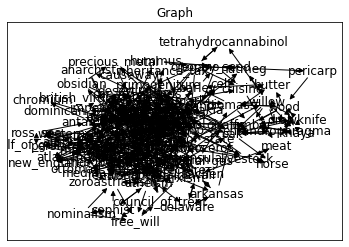

In [81]:
pos = nx.kamada_kawai_layout(graph)
#nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_edges(graph, pos)
nx.draw_networkx_labels(graph, pos)
plt.title('Graph')

### Optimal Paths

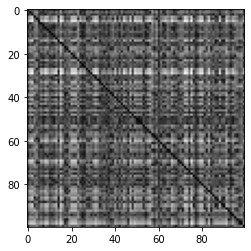

In [171]:
n_nodes = len(graph.nodes)
node2idx = {n : i for i,n in enumerate(graph.nodes)}
idx2node = {node2idx[n] : n for n in node2idx}

dist_matrix = np.zeros((n_nodes, n_nodes)).astype(np.uint8)

for i in range(n_nodes):
    for j in range(n_nodes):
        n1 = idx2node[i]
        n2 = idx2node[j]
        dist_matrix[i,j] = len(nx.shortest_path(graph, source=n1, target=n2))
plt.imshow(dist_matrix, cmap='gray')

# Agent

### Select nodes

In [172]:
start_node, target_node = np.random.choice(list(graph.nodes), size=2, replace=False)
print(f'Start: {start_node}\nEnd: {target_node}')

Start: oak
End: gabon


### Optimal Solution

In [173]:
# Optimal Agent
optimal_path = nx.shortest_path(graph, source=start_node, target=target_node)
print(f'Optimal path length: {len(optimal_path)}')
optimal_path

Optimal path length: 3


['oak', 'jordan', 'gabon']

### Random Agent

In [174]:
rand_agent = ag.RandomAgent()
n_tries = 10
p_lengths = []

for _ in tqdm(range(n_tries)):   
    random_path, converged = ag.wikiRace(rand_agent, graph, start_node, target_node, resp_dict)
    if converged:
        p_lengths.append(len(random_path))
    else:
        p_lengths.append(-1)
p_lengths = np.array(p_lengths)
converged = p_lengths>=0
print(f'Random: {np.mean(p_lengths[converged])}, Not converged: {np.sum(~converged)}')

  0%|          | 0/10 [00:00<?, ?it/s]

Random: 81.75, Not converged: 6


### Human Agent

In [175]:
human_agent = ag.HumanAgent()
human_path, converged = ag.wikiRace(human_agent, graph, start_node, target_node, resp_dict)
print(f'Human path length: {len(human_path)}')

Current node: oak
Choose your next node (Target: gabon)
(0)...	algeria
(1)...	austin
(2)...	birch
(3)...	carpentry
(4)...	cedrus
(5)...	croatia
(6)...	cyprus
(7)...	drill
(8)...	elm
(9)...	fir
(10)...	germany
(11)...	italy
(12)...	jordan
(13)...	larch
(14)...	leaf
(15)...	lithuania
(16)...	plywood
(17)...	shrub
(18)...	tree
(19)...	vietnam
5
Moving to croatia
Current node: croatia
Choose your next node (Target: gabon)
(0)...	afghanistan
(1)...	algeria
(2)...	baroque
(3)...	cyprus
(4)...	germany
(5)...	iceland
(6)...	israel
(7)...	italy
(8)...	libya
(9)...	lithuania
(10)...	protestantism
(11)...	togo
(12)...	uzbekistan
8
Moving to libya
Current node: libya
Choose your next node (Target: gabon)
(0)...	afghanistan
(1)...	algeria
(2)...	croatia
(3)...	cyprus
(4)...	eritrea
(5)...	israel
(6)...	italy
(7)...	togo
4
Moving to eritrea
Current node: eritrea
Choose your next node (Target: gabon)
(0)...	algeria
(1)...	engineering
(2)...	libya
(3)...	togo
(4)...	zinc
2
Moving to libya
Current node

### Greedy Routing Agent

In [176]:
perception_func = perc.word2vec_perception
dist_func = utils.cosine_dist
agent = ag.GraphGreedyAgent(perception=perception_func, dist_func=dist_func)

graph_greedy_path, converged = ag.wikiRace(agent, graph, start_node, target_node, resp_dict)
print(f'Greedy + Graph: {len(graph_greedy_path)}')

Greedy + Graph: 3


# Optimal vs. Random vs. Word2Vec

In [177]:
# Dataset
np.random.seed(1)
ds = utils.create_ds(graph, n_data = 100, min_path_length=0, max_path_length=5)   

In [178]:
# Random:
results_rand = []
convergence_rand = []
for start_node, target_node, opt_solution in tqdm(ds):
    agent = ag.RandomAgent()
    random_path, converged = ag.wikiRace(agent, graph, start_node, target_node, resp_dict)
    results_rand.append(len(random_path)-opt_solution)
    convergence_rand.append(converged)
results_rand = np.array(results_rand)

print(f'Mean: {np.mean(results_rand)}\nMedian: {np.median(results_rand)}\nConverge_perc: {np.sum(convergence_rand)/len(ds)}')

  0%|          | 0/100 [00:00<?, ?it/s]

Mean: 123.3
Median: 171.0
Converge_perc: 0.54


In [179]:
# Word2Vec:
results_emb = []
convergence_emb = []
for start_node, target_node, opt_solution in tqdm(ds):
    agent = ag.GraphGreedyAgent(perception=perc.word2vec_perception, dist_func=utils.cosine_dist)
    random_path, converged = ag.wikiRace(agent, graph, start_node, target_node, resp_dict, max_it=500)
    results_emb.append(len(random_path)-opt_solution)
    convergence_emb.append(converged)
results_emb = np.array(results_emb)
print(f'Mean: {np.mean(results_emb)}\nMedian: {np.median(results_emb)}\nConverge_perc: {np.sum(convergence_emb)/len(ds)}')


  0%|          | 0/100 [00:00<?, ?it/s]

Mean: 10.58
Median: 3.0
Converge_perc: 1.0


# Routing on real Wikipedia

### On a dataset

In [242]:
from nltk import FreqDist
from nltk.corpus import brown

corpus = language.corpus&language.nlp_corpus
frequency_list = FreqDist(i.lower() for i in brown.words())
frequency_list = sorted([(w,frequency_list[w]) for w in frequency_list if w in corpus], key=lambda x: -x[1])
dataset_words = [x[0] for x in frequency_list[:2000]]

In [243]:
# Dataset
np.random.seed(1)
n_data = 50
ds = []

for _ in tqdm(range(n_data)):
    start_node, target_node = utils.select_random_challenge(dataset_words, min_links=20)
    ds.append((start_node, target_node))
    
# save dataset
data_path = 'dataset'
if not os.path.exists(data_path):
    os.mkdir(data_path)
    
i = len(os.listdir(data_path))
ds_path = os.path.join(data_path, f'ds_{i}.p')

import pickle

with open(ds_path, 'wb') as handle:
    pickle.dump(ds, handle)

  0%|          | 0/50 [00:00<?, ?it/s]

In [244]:
data_path = 'dataset'
if not os.path.exists(data_path):
    os.mkdir(data_path)
    
i = len(os.listdir(data_path))
ds_path = os.path.join(data_path, f'ds_{i-1}.p')

# load dataset
with open(ds_path, 'rb') as handle:
    ds = pickle.load(handle)

In [248]:
res_agent = []
for start_node, target_node in tqdm(ds):
    agent = ag.GraphGreedyAgent(perception=perc.word2vec_perception, dist_func=utils.cosine_dist)
    kwargs = {
        'agent' : agent,
        'start_node' : start_node,
        'target_node' : target_node,
        'max_it' : 50,
        'print_progress' : False,
        'scrape_params' : {'allowed_words' : language.nlp_corpus}
    }
    path, terminated = ag.wikiRaceReal(**kwargs)
    print(start_node, target_node, len(path))
    if terminated:
        res_agent.append(len(path))
    else:
        res_agent.append(-1)
res_agent = np.array(res_agent)

  0%|          | 0/50 [00:00<?, ?it/s]

insurance hall 3
california c 51
intellectual peace 5
japan pain 5
coffee bank 4
r witness 33
stay bullet 31
committee policy 16
pencil park 51
running element 10
wood anxiety 14
emergency festival 5
baker origin 51
worry true 4
weapon porch 7
submarine sound 6
race blood 2
emergency magic 12
system winter 11
wagon lawyer 15
wage language 6
tea pleasure 11
machine studio 19
room nature 3
hole darkness 47
pistol dress 5
today collective 31
pathology witness 5
queen free 51
source sitting 51
hole driving 51
street island 8
worship electronics 28
aid opera 8
driving design 9
widow headquarters 40
stream plant 7
flow address 32
man meat 6
system music 3
mail lie 33
experiment image 8
sleep wear 51
vision silver 7
baseball child 30
morning dignity 42
opera forest 28
center action 10
conversation advertising 4
march damage 51


In [249]:
fail_mask = res_agent<0
print(f'Failed: {np.sum(fail_mask)/len(res_agent)}')
print(f'Mean: {np.mean(res_agent[~fail_mask])}')
print(f'Median: {np.median(res_agent[~fail_mask])}')

Failed: 0.22
Mean: 14.153846153846153
Median: 8.0


### A single example

In [2]:
importlib.reload(ag)
importlib.reload(utils)
importlib.reload(language)
importlib.reload(perc)

agent = ag.GraphGreedyAgent(perception=perc.word2vec_perception, dist_func=utils.cosine_dist)
kwargs = {
    'agent' : agent,
    'start_node' : 'madrid',
    'target_node' : 'aztec',
    'max_it' : 100,
    'print_progress' : True,
    'scrape_params' : {'allowed_words' : language.nlp_corpus}
}
path, terminated = ag.wikiRaceReal(**kwargs)

Navigating from madrid to aztec
madrid


C:\Users\Paul Kahlmeyer\anaconda3\lib\site-packages\scipy\spatial\distance.py:728: RuntimeWarning: invalid value encountered in float_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


Morocco
Egypt


KeyboardInterrupt: 

# Human Dataset

In [3]:
importlib.reload(utils)
importlib.reload(ag)

<module 'agent' from 'C:\\Users\\Paul Kahlmeyer\\OneDrive\\PhD\\WikipediaRouting\\code\\agent.py'>

In [4]:
import pickle
import perception as perc
import language

store_path = 'human_results.p'
with open(store_path, 'rb') as handle:
    ds = pickle.load(handle)
    
new_ds = {}
for start, target in tqdm(ds):
    if language.nlp_check(target):
        # add all paths starting from first valid article
        for p in ds[((start, target))]:
            for i in range(len(p)):
                if language.nlp_check(p[i]):
                    break
            new_start = p[i]
            if new_start != target:
                if (new_start,target) not in new_ds:
                    new_ds[(new_start,target)] = [p[i:]]
                else:
                    new_ds[(new_start,target)].append(p[i:])
len(new_ds)

  0%|          | 0/3820 [00:00<?, ?it/s]

3806

# TODO: Collect data

In [5]:
results_path = 'total_results.p'
if os.path.exists(results_path):
    with open(results_path, 'rb') as handle:
        res_dict = pickle.load(handle)
else:
    res_dict = {}
    
    
    
for (start, target) in tqdm(new_ds):
    path_res = {}
    
    print(f'From {start} to {target}')
    
    if (start,target) not in res_dict:
    
        humans = np.array([len(p) for p in new_ds[(start,target)]])
        best_human = np.min(humans)
        avg_human = np.mean(humans)
        worst_human = np.max(humans)
        median_human = np.median(humans)
        print(f'Human: {best_human}')
        path_res['human_best'] = best_human
        path_res['human_avg'] = avg_human
        path_res['human_median'] = median_human
        path_res['human_worst'] = worst_human


        # Agent
        agent = ag.GraphGreedyAgent(perception=perc.word2vec_perception, dist_func=utils.cosine_dist)
        kwargs = {
            'agent' : agent,
            'start_node' : start,
            'target_node' : target,
            'max_it' : 50,
            'print_progress' : False,
            'scrape_params' : {'allowed_words' : language.nlp_corpus}
        }
        path, terminated = ag.wikiRaceReal(**kwargs)
        best_agent = len(path)
        if not terminated:
            best_agent = 'not terminated'

        print(f'Agent: {best_agent}')
        path_res['agent_word2vec'] = len(path) 

        res_dict[(start,target)] = path_res
        
        # save intermediate
        with open(results_path, 'wb') as handle:
            pickle.dump(res_dict, handle)
    else:
        print(f"Human: {res_dict[(start, target)]['human_best']}")
        print(f"Agent: {res_dict[(start, target)]['agent_word2vec']}")


  0%|          | 0/3806 [00:00<?, ?it/s]

From nebraska to asthma
Human: 6
Agent: 5
From mascot to emperor
Human: 3
Agent: 12
From publishing to emperor
Human: 18
Agent: 4
From internet to time
Human: 6
Agent: 14
From time-sharing to time
Human: 3
Agent: 14
From mammal to paleontology
Human: 2
Agent: 3
From mormonism to airliner
Human: 6
Agent: 9
From bible to astronomer
Human: 6
Agent: 11
From evangelism to astronomer
Human: 14
Agent: 15
From cosmos to astronomer
Human: 8
Agent: 14
From steel to silicon
Human: 2
Agent: 2
From liverpool to nero
Human: 12
Agent: 51
From physics to aristotle
Human: 3
Agent: 2
From mass to aristotle
Human: 5
Agent: 4
From horse to pharmacy
Human: 4
Agent: 4
From medicine to pathology
Human: 3
Agent: 2
From cheese to wine
Human: 4
Agent: 3
From bloating to wine
Human: 5
Agent: 6
From japan to ramen
Human: 2
Agent: 2
From microorganism to hormone
Human: 2
Agent: 4
From astrology to fascism
Human: 9
Agent: 3
From japan to rice
Human: 3
Agent: 3
From china to rice
Human: 4
Agent: 4
From goddess to po

From logo to suicide
Human: 6
Agent: 5
From sphinx to fascism
Human: 9
Agent: 6
From meditation to ocean
Human: 6
Agent: 3
From human to physician
Human: 4
Agent: 3
From horse to apple
Human: 5
Agent: 23
From organization to institution
Human: 2
Agent: 2
From americans to laser
Human: 3
Agent: 10
From india to nunavut
Human: 4
Agent: 3
From patient to analgesic
Human: 3
Agent: 3
From physician to confucianism
Human: 4
Agent: 3
From religion to zoroastrianism
Human: 2
Agent: 2
From iran to zoroastrianism
Human: 2
Agent: 2
From radiation to queens
Human: 5
Agent: 51
From balkans to cooperative
Human: 7
Agent: 10
From pregnancy to universe
Human: 4
Agent: 7
From classroom to liquid
Human: 3
Agent: 6
From scotland to liquid
Human: 6
Agent: 5
From chemistry to liquid
Human: 2
Agent: 2
From canada to liquid
Human: 12
Agent: 11
From india to scorpion
Human: 6
Agent: 10
From reptile to scorpion
Human: 4
Agent: 7
From florida to milan
Human: 3
Agent: 4
From manhattan to milan
Human: 5
Agent: 3


Agent: 5
From theatre to tragedy
Human: 2
Agent: 2
From romanticism to tragedy
Human: 4
Agent: 2
From dramaturgy to tragedy
Human: 2
Agent: 2
From caligula to drug
Human: 7
Agent: 9
From lung to symbol
Human: 4
Agent: 7
From miami to gout
Human: 10
Agent: 51
From seattle to ice
Human: 5
Agent: 4
From cleveland to ice
Human: 7
Agent: 4
From iceberg to ice
Human: 2
Agent: 2
From chicago to ice
Human: 10
Agent: 3
From alaska to ice
Human: 8
Agent: 15
From donkey to lightning
Human: 3
Agent: 9
From vienna to archipelago
Human: 5
Agent: 3
From london to archipelago
Human: 3
Agent: 9
From americans to archipelago
Human: 4
Agent: 3
From canada to archipelago
Human: 7
Agent: 6
From london to lostprophets
Human: 4
Agent: 14
From turbine to energy
Human: 2
Agent: 2
From infrastructure to energy
Human: 4
Agent: 2
From heat to energy
Human: 2
Agent: 2
From capitalism to energy
Human: 5
Agent: 5
From electronics to energy
Human: 3
Agent: 3
From technology to energy
Human: 5
Agent: 2
From sugar to e

Agent: 6
From copper to massachusetts
Human: 7
Agent: 3
From chemistry to electron
Human: 2
Agent: 2
From science to electron
Human: 2
Agent: 2
From electricity to electron
Human: 2
Agent: 2
From atomism to electron
Human: 3
Agent: 3
From collider to electron
Human: 3
Agent: 2
From dna to electron
Human: 7
Agent: 3
From egypt to manufacturing
Human: 3
Agent: 7
From fish to chordate
Human: 2
Agent: 2
From liquid to israelites
Human: 6
Agent: 5
From bicycle to dvd
Human: 5
Agent: 10
From africa to nickel
Human: 4
Agent: 3
From coin to nickel
Human: 2
Agent: 2
From neolithic to nickel
Human: 4
Agent: 4
From folklore to giraffe
Human: 5
Agent: 13
From africa to giraffe
Human: 2
Agent: 15
From superhero to giraffe
Human: 9
Agent: 5
From europe to minnesota
Human: 4
Agent: 45
From blood to minnesota
Human: 12
Agent: 4
From fish to minnesota
Human: 6
Agent: 3
From netherlands to minnesota
Human: 4
Agent: 4
From microscope to minnesota
Human: 8
Agent: 20
From bohemianism to castlevania
Human: 

## Optimal Paths

In [6]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from selenium.common.exceptions import NoSuchElementException


results_path = 'total_results.p'
with open(results_path, 'rb') as handle:
    res_dict = pickle.load(handle)


browser = webdriver.Firefox()
browser.get(('https://www.sixdegreesofwikipedia.com/'))
start_input, target_input = browser.find_elements_by_class_name('react-autosuggest__input')
max_it = 20
for (start, target) in tqdm(res_dict):
    if not 'opt' in res_dict[(start,target)]:
        browser.refresh()
        time.sleep(2)
        start_input, target_input = browser.find_elements_by_class_name('react-autosuggest__input')
        start_input.clear()
        start_input.send_keys(start)
        target_input.clear()
        target_input.send_keys(target)
        browser.find_element_by_css_selector('.sc-hBMUJo.sc-iJCRrE.eYvREG.bojiJp').click()

        found = False
        count = 0
        while (not found) and count<max_it:
            try:
                text_field = browser.find_element_by_css_selector('.sc-fKgJPI.cXaotj')
                tmp = text_field.text.split(' ')
                i = tmp.index('to')
                msg_start = tmp[i-1].lower()
                msg_target = tmp[i+1].lower()
                i = tmp.index('with')
                len_opt = int(tmp[i+1])+1
                found = start in msg_start and target in msg_target

                if not found:
                    time.sleep(1)
                else:
                    res_dict[(start, target)]['opt'] = len_opt
                    # save intermediate
                    with open(results_path, 'wb') as handle:
                        pickle.dump(res_dict, handle)
                    



            except NoSuchElementException as e:
                time.sleep(1)
            finally: 
                if count==(max_it-1):
                    found = True
                count += 1
                
    print(start, target)
    
    
# remove entries, where optimal solution is worse than human or agent or no optimal solution was found
errors = []
for s,t in res_dict:
    if 'opt' in res_dict[(s,t)]:
        if res_dict[(s,t)]['opt']>res_dict[(s,t)]['human_best'] or res_dict[(s,t)]['opt']>res_dict[(s,t)]['agent_word2vec']:
            errors.append((s,t))
    else:
        errors.append((s,t))
for (s,t) in errors:
    del res_dict[(s,t)]    
    

with open(results_path, 'wb') as handle:
    pickle.dump(res_dict, handle)
browser.close()

  0%|          | 0/3806 [00:00<?, ?it/s]

nebraska asthma
mascot emperor
publishing emperor
internet time
time-sharing time
mammal paleontology
mormonism airliner
bible astronomer
evangelism astronomer
cosmos astronomer
steel silicon
liverpool nero
physics aristotle
mass aristotle
horse pharmacy
medicine pathology
cheese wine
bloating wine
japan ramen
microorganism hormone
astrology fascism
japan rice
china rice
goddess poseidon
italy revolution
heredity latitude
vanuatu polynesia
kazakhstan coal
earth coal
fishing website
matter crocodile
rome feces
feces jaundice
commerce corporation
company corporation
business corporation
shareholder corporation
cotton theology
geography aircraft
philosophy aircraft
liberty aircraft
politics aircraft
americas aircraft
archipelago upn
hyperthyroidism cocaine
cleveland indiana
california indiana
germany war
mythology war
thor war
geography tropics
hamburger measles
philadelphia town
municipality town
hawaii town
constipation deer
methamphetamine pennsylvania
rum wine
rome wine
balkans dictio

database basketball
hampshire u2
eminem medication
culture sodium
wembley philosophy
england philosophy
greeks philosophy
winter universe
piano hanukkah
venice boat
shipbuilding boat
poseidon boat
england boat
renaissance boat
motet boat
politics boat
well-defined podcast
homosexuality homophobia
americans homophobia
abolitionism zeus
disease paradox
hippocrates paradox
heroin integer
hanukkah europe
japan wasabi
agriculture wasabi
taiwan wasabi
canada wasabi
matter nicotine
vermont snow
uber snow
switzerland snow
airbnb snow
sport wrestlemania
wrestling wrestlemania
running wrestlemania
medicine epidemic
software epidemic
bamboo statistics
christmas morality
gulag hbo
influenza predation
fentanyl predation
alphabet hindi
illinois livestock
cannibalism livestock
poverty neurology
message pixar
galaxy jesus
blue shotgun
australia koala
americans koala
australians koala
oceania koala
alabama musician
sicily uefa
italy uefa
italians uefa
concacaf uefa
switzerland uefa
fifa uefa
london uef

paris immunology
china immunology
massachusetts lobster
queens lobster
science lobster
liquid lobster
physics lobster
superhero hero
spider-man hero
freedman hero
metafiction hero
biology arkansas
fortification house
strasbourg house
australasia paramore
star kentucky
clock existence
u2 podcast
remix podcast
bilirubin mumps
robotics speech
morality metabolism
pollution monkey
directv ebay
retail ebay
comics ebay
portsmouth ebay
earth moon
dimension moon
landscape moon
wargaming moon
planet moon
illinois moon
game moon
wheat amtrak
electronics quark
europe quark
science quark
pong nintendo
pixar nintendo
smartphone nintendo
japan nintendo
maine lobster
sea lobster
hirohito motorcycle
abraham istanbul
microorganism myth
death funeral
pandemic funeral
typhus funeral
smallpox funeral
analgesic drug
depressant drug
tobacco drug
disease bacteria
world bacteria
religion bacteria
fishing aryan
flower bible
manhattan zoroastrianism
jazz avant-garde
milk utah
red confucianism
stonehenge marble
m

california epistemology
auckland baptism
colonialism baptism
sexting baptism
fruit indiana
nasa wisconsin
houston wisconsin
florida wisconsin
infection immunology
canada immunology
indiana bridge
california bridge
municipality bridge
bluetooth smartphone
wi-fi smartphone
computer smartphone
laptop smartphone
email smartphone
security smartphone
economy smartphone
student photography
celts apartheid
fish tool
fire enzyme
theatre tragedy
romanticism tragedy
dramaturgy tragedy
caligula drug
lung symbol
miami gout
seattle ice
cleveland ice
iceberg ice
chicago ice
alaska ice
donkey lightning
vienna archipelago
london archipelago
americans archipelago
canada archipelago
london lostprophets
turbine energy
infrastructure energy
heat energy
capitalism energy
electronics energy
technology energy
sugar energy
productivity energy
need energy
fungus otaku
california wisconsin
prune fruit
pear fruit
berry fruit
acorn fruit
elk fruit
bear fruit
pineapple gravity
jellyfish ibm
hair coffee
lawyer x-ray

netherlands edema
smartphone neuron
irony gin
mercenary theatre
switzerland evangelicalism
arabic evangelicalism
death evangelicalism
evangelism evangelicalism
guangdong evangelicalism
antibiotic evangelicalism
netherlands evangelicalism
drama swat
switzerland world
spain world
spaceflight world
naples world
canada stock
montreal stock
calgary stock
americas stock
germany trinity
google trinity
death baptism
protestantism baptism
europe baptism
kansas baptism
china tiger
india tiger
lion tiger
rwanda tiger
thessaloniki hypertension
emo hair
hairstyles hair
hairstyle hair
zine hair
subculture hair
currency gold
matter gold
standings gold
satellite louisiana
fishing gold
honolulu paramore
tennessee paramore
pop-punk paramore
gladiator blood
ethics meteorology
guitar spleen
mirror wood
pneumonia hiv
homosexuality hiv
hiv/aids hiv
lipid wiki
vampire devo
biodiversity sociology
michigan sociology
science sociology
earth sociology
hawaii sociology
battleship resistor
carcinogen leukemia
canc

geodesy latitude
iran korea
benin country
brazil country
solid red
silk helium
germany bavaria
canada canadians
quebec canadians
americas canadians
chemistry archimedes
touchscreen technology
telephone technology
neuroscience profession
unix image
urbanization poetry
toronto poetry
thermodynamics bmw
bible moses
atheism moses
eurasia agriculture
silk agriculture
metallica witchcraft
banknote fructose
cavalry archipelago
chess law
geography perception
eyebrow perception
organism perception
region perception
africa perception
anime wi-fi
gambling protein
swedes hiroshima
atom hiroshima
ireland bewitched
internet firefox
google firefox
california wood
cannabis wood
furniture wood
moscow wood
hbo wood
india otaku
opioid seinfeld
broadcasting armageddon
botany potato
barbiturate gambling
morphine fructose
hydrogen biosphere
broadcasting dvd
france dvd
wisconsin dvd
chicago dvd
post-production dvd
shiva owl
geek cosmology
devon earth
northumbria earth
continent earth
europe earth
americas ea

cardiology potassium
calcification potassium
iraq elephant
baghdad elephant
cairo elephant
community paracetamol
combatant combat
france combat
war combat
claudius halloween
drug cannabinoid
netherlands cannabinoid
americas t.i.
iowa wheat
blues wheat
peyote wheat
knight hero
film bollywood
malaysia bollywood
university bollywood
india bollywood
marylebone bollywood
england bollywood
scientist bollywood
eukaryote seinfeld
metaphysics midi
laptop supercomputer
furnace supercomputer
electron supercomputer
neuroscience supercomputer
physiology supercomputer
romanticism moustache
human dementia
creativity dementia
aesthetics dementia
society dementia
acting dementia
canada ibm
india ibm
australia ibm
africa ibm
physics mathematics
physiology mathematics
dynamite mathematics
chemistry mathematics
medicine mathematics
florida bong
samurai australasia
methamphetamine radio
agriculture livestock
kansas livestock
alaska livestock
drug heredity
americas aztec
quetzalcoatl aztec
ohio aztec
califo

In [7]:
# agent vs. human
with open(results_path, 'rb') as handle:
    res_dict = pickle.load(handle)

    
only_terminated = False
wins_human = 0
wins_agent = 0
draws = 0
for (s,t) in res_dict:
    if 'human_best' in res_dict[(s,t)] and 'agent_word2vec' in res_dict[(s,t)]:
    
        human_steps = res_dict[(s,t)]['human_best']
        agent_steps = res_dict[(s,t)]['agent_word2vec']

        if agent_steps<51 or not only_terminated:
            if human_steps<agent_steps:
                wins_human += 1
            elif agent_steps<human_steps:
                wins_agent += 1
            else:
                draws += 1
        
total = wins_human+wins_agent+draws
print(f'Human Wins {wins_human/total}')
print(f'Agent Wins {wins_agent/total}')
print(f'Draws {draws/total}')

Human Wins 0.3878213802435724
Agent Wins 0.3553450608930988
Draws 0.2568335588633288


In [11]:
# comparison vs. best
with open(results_path, 'rb') as handle:
    res_dict = pickle.load(handle)

    
only_terminated = True

agent_res = []
human_res = []
for (s,t) in res_dict:
    if 'human_best' in res_dict[(s,t)] and 'agent_word2vec' in res_dict[(s,t)] and 'opt' in res_dict[(s,t)]:
        human_steps = res_dict[(s,t)]['human_best']
        agent_steps = res_dict[(s,t)]['agent_word2vec']
        opt_steps = res_dict[(s,t)]['opt']
        if agent_steps<51 or not only_terminated:
            agent_res.append(agent_steps/opt_steps)
            human_res.append(human_steps/opt_steps)

agent_res = np.array(agent_res)
human_res = np.array(human_res)

print(f'Human Mean {np.mean(human_res)}')
print(f'Human Median {np.median(human_res)}')
print(f'Agent Mean {np.mean(agent_res)}')
print(f'Agent Median {np.median(agent_res)}')

Human Mean 1.6393693693693694
Human Median 1.5
Agent Mean 2.1735324798482694
Agent Median 1.3333333333333333
